In [157]:
import pandas as pd
import matplotlib.pyplot as plt

In [179]:
df = pd.read_csv('PUB_ACT.csv')

def get_name(val):
    _ = val.split(" - ")

    if len(_) == 2:    
        return _[1]
    else:
        return None

#actividades = list(map(get_name, df['Subrubro economico'].unique()))
actividades = df['Subrubro economico'].unique()

In [180]:
for act in actividades:
    if act and  ('venta' in act.lower()):
        print(act)

        

463 - Venta al por mayor de alimentos, bebidas y tabaco
462 - Venta al por mayor de materias primas agropecuarias y animales vivos
477 - Venta al por menor de otros productos en comercios especializados
466 - Otras actividades de venta al por mayor especializada
472 - Venta al por menor de alimentos, bebidas y tabaco en comercios especializados
465 - Venta al por mayor de maquinaria, equipo y materiales
471 - Venta al por menor en comercios no especializados
461 - Venta al por mayor a cambio de una retribución o por contrata
464 - Venta al por mayor de enseres domésticos
454 - Venta, mantenimiento y reparación de motocicletas y sus partes, piezas y accesorios
476 - Venta al por menor de productos culturales y recreativos en comercios especializados
453 - Venta de partes, piezas y accesorios para vehículos automotores
451 - Venta de vehículos automotores
475 - Venta al por menor de otros enseres domésticos en comercios especializados
479 - Venta al por menor no realizada en comercios, p

In [181]:
SUBRUBROS = [
    '477 - Venta al por menor de otros productos en comercios especializados',
    '474 - Venta al por menor de equipo de información y de comunicaciones en comercios especializados',
    '475 - Venta al por menor de otros enseres domésticos en comercios especializados',
]

ANOS = range(2018, 2022 + 1)

ACTIVIDADES = [
    '475201 - Venta al por menor de artículos de ferretería y materiales de construcción',
    '474100 - Venta al por menor de computadores, equipo periférico, programas informáticos y equipo de telecom.',
    '475300 - Venta al por menor de tapices, alfombras y cubrimientos para paredes y pisos',
    '477394 - Venta al por menor de artículos de joyería, bisutería y relojería en comercios especializados',
    '477399 - Venta al por menor de otros productos en comercios especializados n.c.p.',
    '474200 - Venta al por menor de equipo de sonido y de video en comercios especializados',
    '475909 - Venta al por menor de aparatos eléctricos, textiles para el hogar y otros enseres domésticos n.c.p.',
    '475100 - Venta al por menor de telas, lanas, hilos y similares en comercios especializados',
    '477101 - Venta al por menor de calzado en comercios especializados',
    '477203 - Venta al por menor de artículos de perfumería, de tocador y cosméticos en comercios especializados',
    '475902 - Venta al por menor de instrumentos musicales en comercios especializados',
    '477102 - Venta al por menor de prendas y accesorios de vestir en comercios especializados',
    '475901 - Venta al por menor de muebles y colchones en comercios especializados',
    '477103 - Venta al por menor de carteras, maletas y otros accesorios de viaje en comercios especializados',
]

In [185]:
df_filtrado

,Año Comercial,Número de empresas,Ventas anuales en UF,Número de trabajadores dependientes informados,Renta neta informada en UF,Trabajadores ponderados por meses trabajados,Número de trabajadores dependientes de género femenino informados,"Renta neta informada en UF, trabajadores de género femenino",Trabajadores de género femenino ponderados por meses trabajados,Número de trabajadores dependientes de género masculino informados,...,Trabajadores de género masculino ponderados por meses trabajados,Número de trabajadores a honorarios informados,Honorarios pagados informados en UF,Trabajadores a honorarios ponderados por meses trabajados,Número de trabajadores a honorarios de género femenino informados,Honorarios pagados informados a trabajadores de género femenino en UF,Trabajadores a honorarios de género femenino ponderados por meses trabajados,Número de trabajadores a honorarios de género masculino informados,Honorarios pagados informados a trabajadores de género masculino en UF,Trabajadores a honorarios de género masculino ponderados por meses trabajados
8096,2018,8,*,13,*,9,6,*,5,7,...,4,25,*,7,11,*,3,14,*,3
8124,2018,"32,661","129,307,753","64,909","12,802,338","43,061","27,612","4,426,659","18,334","37,114",...,"24,725","36,173","1,625,502","15,471","17,707","660,307","8,052","18,466","965,195","7,418"
8144,2018,"3,032","10,275,147","5,785","829,225","3,832","3,981","490,394","2,536","1,795",...,"1,297","3,728","157,695","1,746","1,945","84,805",951,"1,783","72,890",795
8203,2018,"2,675","55,492,023","12,032","2,136,313","7,346","8,398","1,404,572","5,310","3,574",...,"2,035","229,267","1,967,690","119,891","208,814","1,802,306","111,464","20,453","165,334","8,422"
8253,2018,568,"1,755,975","1,020","122,258",592,405,"43,114",227,614,...,365,783,"17,864",323,335,"8,174",158,448,"9,690",165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10919,2022,104,"176,019",68,"9,715",48,28,"4,176",20,40,...,28,47,"2,874",17,22,324,8,25,"2,550",9
11044,2022,"2,173","6,913,977","3,640","599,608","2,450","1,422","238,972",969,"2,216",...,"1,482","3,103","140,047","1,133","1,752","68,663",614,"1,351","71,384",518
11074,2022,408,"1,717,879",550,"112,119",404,157,"31,498",120,392,...,284,434,"26,644",156,109,"5,904",49,325,"20,740",107
11177,2022,"3,494","11,263,247","4,690","722,070","3,300","3,013","401,079","2,078","1,646",...,"1,223","2,439","100,028","1,176","1,515","49,330",674,924,"50,698",502


In [186]:
df_filtrado = df.loc[df['Año Comercial'].isin(ANOS)].loc[df['Rubro economico'] == 'G - Comercio al por mayor y al por menor; reparación de vehículos automotores y motocicletas'].loc[df['Subrubro economico'].isin(SUBRUBROS)].loc[df['Subrubro economico'].isin(SUBRUBROS)]
df_filtrado = df_filtrado.loc[df['Actividad economica'].isin(ACTIVIDADES)]
df_filtrado.drop(['Subrubro economico', 'Rubro economico', 'Actividad economica'], axis=1, inplace=True)

df_filtrado.replace('*', None, inplace=True)
df_filtrado.dropna(inplace=True)

for col in df_filtrado.iloc[:, 2:].columns:
    df_filtrado[col] = df_filtrado[col].apply(lambda x: int(x.replace(',', '')))



In [187]:
df_filtrado = df_filtrado.groupby('Año Comercial').sum(numeric_only=True)

In [191]:
ventas = list(df_filtrado['Ventas anuales en UF'].values)

for i in range(1, len(ventas)):
    print((ventas[i] - ventas[i-1])*100/ventas[i-1])

8.671609243118642
9.819232137574883
213.93745818808873
-67.8272755024671


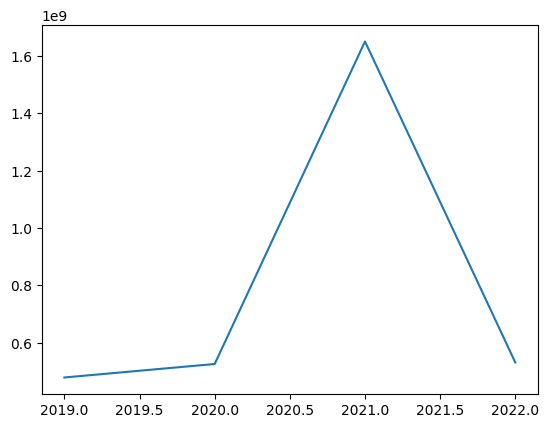

In [170]:
plt.plot(range(2019, 2023), df_filtrado['Ventas anuales en UF'])